 # Hotdog Prediction Model
 
 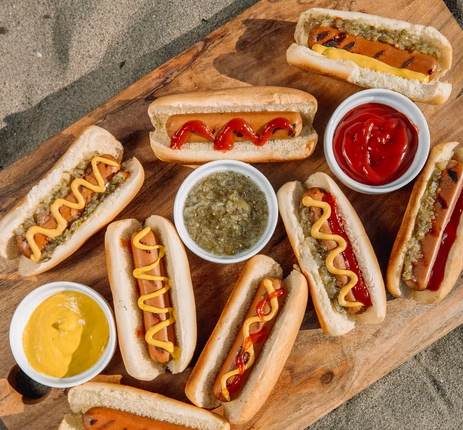

# Introduction

Hotdog Prediction Model is a Machine Learning based frame work which will predict whether a given image is of hotdog or not. Let's have a talk about the dataset.

# Dataset

The dataset for this project is taken from the Kaggle website. Here is the link for the dataset,https://www.kaggle.com/datasets/thedatasith/hotdog-nothotdog.
Here in the dataset you will find the test and training images for the Hotdog | Not Hotdog dataset. The goal is to use this images for binary classification and predict with the help of our model whether the image is of hotdog or not.
This dataset contains:Training images to be used for developing a binary classification model
2121 images of hot dogs, and 2121 images of other items.Test images to be used after training a binary classification model 200 images of hot dogs, and 200 images of other items.
The total number of images is, of course, 2x2121 for training and 2x200 for testing, with a total of 4,642 files.


# Goal

The goal of this project is to build a machine learning model with highest accuracy, which will predict the image is of hotdog or not.

# Approach

In this notebook we will implement various approaches and compare their accuracy with the help of dataset each approach will be divided into different section. For each approach EDA and all techniques of training and testing will be done seperately. 


# Approach Using CNN
A Convolutional Neural Network is a type of neural network that is used in Computer Vision and Natural Language Processing tasks quite often due to the fact that it can learn to extract relevant features from the input data.
A typical CNN layer can be understood with the help of following diagram:
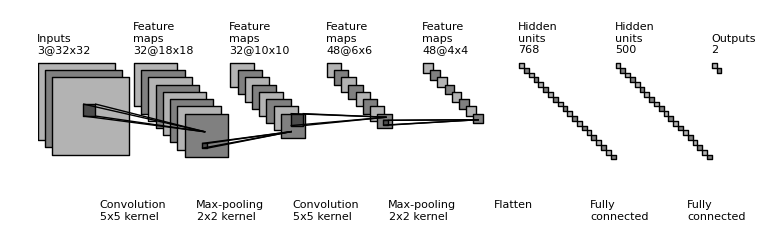

## Importing Libraries

In [1]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
import numpy as np
import os
import cv2

## Adding the model configuration
After specifying the imports, we can add the configuration options for our model:

In [2]:
img_width, img_height = 25, 25
input_shape = (img_width, img_height, 1)
batch_size = 10
no_epochs = 25
no_classes = 2
validation_split = 0.2
verbosity = 1

As we shall see, we'll be using 25 x 25 pixel images that are grayscale (hence the 1 in the input_shape), use a batch size of 10 (our data set will be relatively small), 25 iterations, 2 classes (not hot dog = 0 / hot dog = 1), and 20% of our data will be used for validation purposes. We make the training process verbose, meaning that all results will be printed on screen.

## Loading and preprocessing of the dataset

In [13]:
def load_data(data_type='train', class_name='hotdog'):
  instainstances = []
  classclasses = []
  for filepath in os.listdir(f'../input/hotdog-nothotdog/hotdog-nothotdog/hotdog-nothotdog/{data_type}/{class_name}'):
    resized_image = cv2.imread(f'../input/hotdog-nothotdog/hotdog-nothotdog/hotdog-nothotdog/{data_type}/{class_name}/{format(filepath)}', 0)
    resized_image = cv2.resize(resized_image, (img_width, img_height))
    instances.append(resized_image)
    classes.append(0 if class_name == 'nothotdog' else 1)
  return (instances, classes)

It loads the image using **imread**, as a grayscale image - by means of the 0 specification. We don't want colors of images to interfere with the prediction, as it's all about shape. This is especially important in the case of small datasets, which can be biased. That's why we load the images as grayscale ones.

We resize the images to 25 x 25 pixels, in line with the model configuration specified above. Resizing is necessary for two reasons. Firstly, images can be really large sometimes, and this can hamper learning. It's usually best to train your models with images relatively small in size. Secondly, your model will accept inputs only when they have the shape of the input specified in the Input layer. That's why all images must be using the same number of color channels (that is, either RGB or grayscale, but not both) and be of the same size.

We append the resized image to the list of instances, and the corresponding class number to the list of classes.

We output a tuple with the instances and classes.


## Creating the model skeleton

Now we have defined a function for loading and preprocessing the data, we can move on and create a function that creates the model skeleton. Such a skeleton is essentially the representation of the model building blocks - i.e., the architecture. 

In [4]:
def create_model():
  model = Sequential()
  model.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(Conv2D(8, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(12, kernel_size=(3, 3), activation='relu'))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))
  return model

The steps performed are simple: a model is created with the Sequential API, three convolutional layers are stacked on top of each other, a Flatten operation which allows the output feature maps to be input by the Dense layers, which finally generate a multiclass probability distribution using Softmax.

## Instantiating the model


In [5]:
def compile_model(model):
  model.compile(loss=tensorflow.keras.losses.sparse_categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])
  return model

Here, we specify things like the loss function (we use sparse categorical crossentropy loss because our targets, our y values, are integers rather than one-hot encoded vectors - it is functionally equal to categorical crossentropy loss). We also specify the optimize, which can be gradient descent-based or Adaptive, like Adam. In addition, we specify additional metrics. We then return the model again to be used by the next step.

## Training

In [6]:
def train_model(model, X_train, y_train):
  model.fit(X_train, y_train,
            batch_size=batch_size,
            epochs=no_epochs,
            verbose=verbosity,
            shuffle=True,
            validation_split=validation_split)
  return model

Here, we accept the model as well as the features and corresponding targets from the training set. Using configuration options specified in the model configuration (such as batch size, number of epochs, and verbosity) we start the training process. We do so by calling model.fit, which essentially fits the data to the model and attempts to find the global loss minimum. Once training has finished, which in our case happens after 25 iterations (or epochs), the trained model is returned.

## Generating evaluation metrics

In [7]:
def test_model(model, X_test, y_test):
  score = model.evaluate(X_test, y_test, verbose=0)
  print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')
  return model

## Load and merge training data

In [10]:
X_train_nh, y_train_nh = load_data(data_type='train', class_name='nothotdog')
X_train_h, y_train_h = load_data(data_type='train', class_name='hotdog')
X_train = np.array(X_train_nh + X_train_h)
X_train = X_train.reshape((X_train.shape[0], img_width, img_height, 1))
y_train = np.array(y_train_nh + y_train_h)


## Load and merge testing data

In [11]:
X_test_nh, y_test_nh = load_data(data_type='test', class_name='nothotdog')
X_test_h, y_test_h = load_data(data_type='test', class_name='hotdog')
X_test = np.array(X_test_nh + X_test_h)
X_test = X_test.reshape((X_test.shape[0], img_width, img_height, 1))
y_test = np.array(y_test_nh + y_test_h)

## Create and train the model

In [12]:
model = create_model()
model = compile_model(model)
model = train_model(model, X_train, y_train)
model = test_model(model, X_test, y_test)

2022-08-09 17:39:42.709292: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-08-09 17:39:43.109936: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
340/340 [==============================] - 4s 9ms/step - loss: 1.0937 - accuracy: 0.5912 - val_loss: 0.9287 - val_accuracy: 0.1237
Epoch 2/25
340/340 [==============================] - 3s 8ms/step - loss: 0.5311 - accuracy: 0.7268 - val_loss: 1.0016 - val_accuracy: 0.3498
Epoch 3/25
340/340 [==============================] - 3s 9ms/step - loss: 0.2768 - accuracy: 0.8986 - val_loss: 1.1700 - val_accuracy: 0.3934
Epoch 4/25
340/340 [==============================] - 3s 10ms/step - loss: 0.0753 - accuracy: 0.9844 - val_loss: 2.3328 - val_accuracy: 0.3498
Epoch 5/25
340/340 [==============================] - 3s 8ms/step - loss: 0.0099 - accuracy: 0.9997 - val_loss: 3.4630 - val_accuracy: 0.2933
Epoch 6/25
340/340 [==============================] - 3s 9ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.4581 - val_accuracy: 0.3180
Epoch 7/25
340/340 [==============================] - 3s 9ms/step - loss: 4.6019e-04 - accuracy: 1.0000 - val_loss: 4.0905 - val_accuracy: 0.2945
E

#### With a 52.7% test accuracy, the model performs only slightly better than simply tossing a coin. But that was our first approach. Let's move on to next approach to see whether our accuracy will improve or not.

# Approach Using MONAI Framework

The MONAI framework is the open-source foundation being created by Project MONAI. MONAI is a freely available, community-supported, PyTorch-based framework for deep learning in imaging field. It provides domain-optimized foundational capabilities for developing  imaging training workflows in a native PyTorch paradigm.

Project MONAI also includes MONAI Label, an intelligent open source image labeling and learning tool that helps researchers and clinicians collaborate, create annotated datasets, and build AI models in a standardized MONAI.

## Install MONAI

In [1]:
!pip install -q "monai-weekly[gdown, nibabel, tqdm, itk]"

## Importing Required Libraries for this Approach

In [2]:
import os
import shutil
import tempfile
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2
from sklearn.metrics import classification_report
import torch
from monai.apps import download_and_extract
from monai.config import print_config
from monai.metrics import ROCAUCMetric
from monai.networks.nets import DenseNet121
from monai.transforms import *
from monai.data import Dataset, DataLoader
from monai.utils import set_determinism

## Read image filenames from the dataset folders

In [3]:
train_dir='../input/hotdog-nothotdog/hotdog-nothotdog/hotdog-nothotdog/train'
test_dir='../input/hotdog-nothotdog/hotdog-nothotdog/hotdog-nothotdog/test'

In [4]:
#train
class_names0 = os.listdir(train_dir)
print(class_names0)
class_names = sorted(class_names0)
print(class_names)
num_class = len(class_names)
image_files = [[os.path.join(train_dir, class_name, x) 
               for x in os.listdir(os.path.join(train_dir, class_name))] 
               for class_name in class_names]

image_file_list = []
image_label_list = []
for i, class_name in enumerate(class_names):
    image_file_list.extend(image_files[i])
    image_label_list.extend([i] * len(image_files[i]))
num_total = len(image_label_list)

['hotdog', 'nothotdog']
['hotdog', 'nothotdog']


In [5]:
valid_frac = 0.25
trainX,trainY = [],[]
valX,valY = [],[]

for i in range(num_total):
    rann = np.random.random()
    if rann < valid_frac:
        valX.append(image_file_list[i])
        valY.append(image_label_list[i])
    else:
        trainX.append(image_file_list[i])
        trainY.append(image_label_list[i])

print(len(trainX),len(valX))

3153 1089


In [6]:
#test
t_class_names0 = os.listdir(test_dir)
t_class_names = sorted(t_class_names0)
print(t_class_names)
t_num_class = len(t_class_names)
t_image_files = [[os.path.join(test_dir, t_class_name, x) 
               for x in os.listdir(os.path.join(test_dir, t_class_name))] 
               for t_class_name in t_class_names]

t_image_file_list = []
t_image_label_list = []
for i, class_name in enumerate(t_class_names):
    t_image_file_list.extend(t_image_files[i])
    t_image_label_list.extend([i] * len(t_image_files[i]))

['hotdog', 'nothotdog']


## Visualizing Some Examples

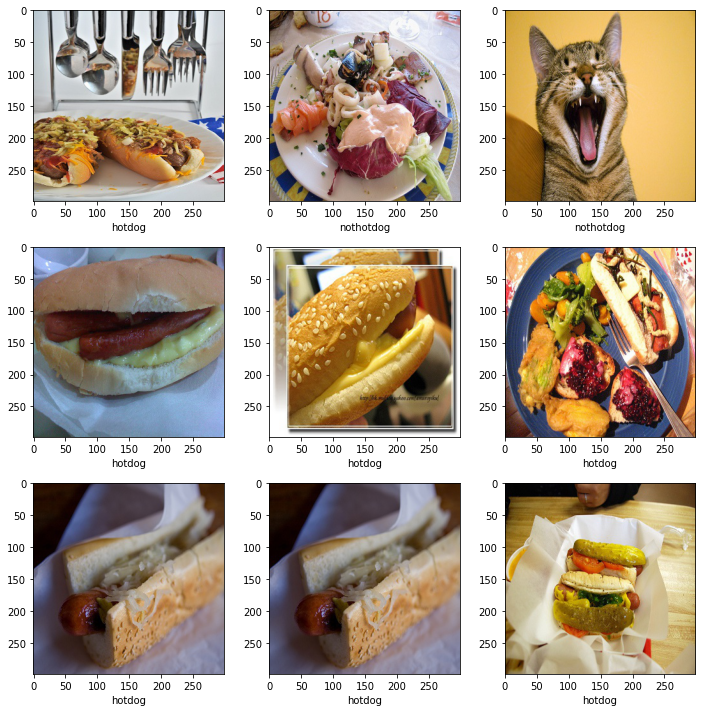

In [7]:
plt.subplots(3,3, figsize=(10,10))
for i,k in enumerate(np.random.randint(num_total, size=9)):
    im = Image.open(image_file_list[k])
    arr = np.array(im)
    #print(arr.shape)
    plt.subplot(3,3, i+1)
    plt.xlabel(class_names[image_label_list[k]])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.show()

## Prepare training, validation and test data lists

In [8]:
trainX=np.array(trainX)
trainY=np.array(trainY)
valX=np.array(valX)
valY=np.array(valY)
testX=np.array(t_image_file_list)
testY=np.array(t_image_label_list)

## Define MONAI transforms, Dataset and Dataloader to pre-process data

In [9]:
class SumDimension(Transform):
    def __init__(self, dim=1):
        self.dim = dim

    def __call__(self, inputs):
        return inputs.sum(self.dim)

In [10]:
class MyResize(Transform):
    def __init__(self, size=(180,180)):
        self.size = size
    def __call__(self, inputs):
        image2=cv2.resize(np.float32(inputs),dsize=(self.size[1],self.size[0]),interpolation=cv2.INTER_CUBIC)
        return image2

In [11]:
train_transforms = Compose([
    LoadImage(image_only=True),
    Resize((-1,1)),
    SumDimension(2),
    MyResize(),
    AddChannel(),    
    ToTensor(),
])

val_transforms = Compose([
    LoadImage(image_only=True),
    Resize((-1,1)),
    SumDimension(2),
    MyResize(),
    AddChannel(),    
    ToTensor(),
])

act = Activations(softmax=True)
to_onehot = AsDiscrete(to_onehot=num_class, n_classes=num_class)

<class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
monai.transforms.post.array AsDiscrete.__init__:n_classes: Argument `n_classes` has been deprecated since version 0.6. please use `to_onehot` instead.
monai.transforms.post.array AsDiscrete.__init__:num_classes: Argument `num_classes` has been deprecated since version 0.7. please use `to_onehot` instead.


In [12]:
class MedNISTDataset(Dataset):

    def __init__(self, image_files, labels, transforms):
        self.image_files = image_files
        self.labels = labels
        self.transforms = transforms

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, index):
        return self.transforms(self.image_files[index]), self.labels[index]

In [13]:
train_ds = MedNISTDataset(trainX, trainY, train_transforms)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True, num_workers=2)

val_ds = MedNISTDataset(valX, valY, val_transforms)
val_loader = DataLoader(val_ds, batch_size=64, num_workers=2)

test_ds = MedNISTDataset(testX, testY, val_transforms)
test_loader = DataLoader(test_ds, batch_size=64, num_workers=2)

In [14]:
device = torch.device("cpu")   #"cuda:0"
model = DenseNet121(
    spatial_dims=2,            
    in_channels=1,
    out_channels=num_class,
).to(device)

loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 1e-5)
epoch_num = 30
val_interval = 1

In [15]:
best_metric = -1
best_metric_epoch = -1
epoch_loss_values = list()
auc_metric = ROCAUCMetric()
metric_values = list()

for epoch in range(epoch_num):
    print('-' * 10)
    print(f"epoch {epoch + 1}/{epoch_num}")
    model.train()
    epoch_loss = 0
    step = 0

    for batch_data in train_loader:
        step += 1
        inputs, labels = batch_data[0].to(device), batch_data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs.float())     ##### 
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        print(f"{step}/{len(train_ds) // train_loader.batch_size}, train_loss: {loss.item():.4f}")
        epoch_len = len(train_ds) // train_loader.batch_size

    epoch_loss /= step
    epoch_loss_values.append(epoch_loss)
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    if (epoch + 1) % val_interval == 0:
        model.eval()
        with torch.no_grad():
            y_pred = torch.tensor([], dtype=torch.float32, device=device)
            y = torch.tensor([], dtype=torch.long, device=device)
            for val_data in val_loader:
                val_images, val_labels = val_data[0].to(device), val_data[1].to(device)
                y_pred = torch.cat([y_pred, model(val_images.float())], dim=0)
                y = torch.cat([y, val_labels], dim=0)
                
            y_onehot = [to_onehot(i) for i in y]
            y_pred_act = [act(i) for i in y_pred]
            auc_metric(y_pred_act, y_onehot)
            auc_result = auc_metric.aggregate()
            auc_metric.reset()
            del y_pred_act, y_onehot
            metric_values.append(auc_result)
            acc_value = torch.eq(y_pred.argmax(dim=1), y)
            acc_metric = acc_value.sum().item() / len(acc_value)
            
            if acc_metric > best_metric:
                best_metric = acc_metric
                best_metric_epoch = epoch + 1
                torch.save(model.state_dict(), 'best_metric_model.pth')
                print('saved new best metric model')
                
            print(f"current epoch: {epoch + 1} current AUC: {auc_result:.4f}"
                  f" current accuracy: {acc_metric:.4f} best AUC: {best_metric:.4f}"
                  f" at epoch: {best_metric_epoch}")
            
print(f"train completed, best_metric: {best_metric:.4f} at epoch: {best_metric_epoch}")

----------
epoch 1/30
1/49, train_loss: 0.6823
2/49, train_loss: 0.6527
3/49, train_loss: 0.6562
4/49, train_loss: 0.6934
5/49, train_loss: 0.6429
6/49, train_loss: 0.6947
7/49, train_loss: 0.6684
8/49, train_loss: 0.6729
9/49, train_loss: 0.6791
10/49, train_loss: 0.6893
11/49, train_loss: 0.6570
12/49, train_loss: 0.6693
13/49, train_loss: 0.6998
14/49, train_loss: 0.6942
15/49, train_loss: 0.6597
16/49, train_loss: 0.6972
17/49, train_loss: 0.6563
18/49, train_loss: 0.6471
19/49, train_loss: 0.6629
20/49, train_loss: 0.6893
21/49, train_loss: 0.7187
22/49, train_loss: 0.6358
23/49, train_loss: 0.6877
24/49, train_loss: 0.6913
25/49, train_loss: 0.6733
26/49, train_loss: 0.7279
27/49, train_loss: 0.6204
28/49, train_loss: 0.6814
29/49, train_loss: 0.6533
30/49, train_loss: 0.6581
31/49, train_loss: 0.6846
32/49, train_loss: 0.6118
33/49, train_loss: 0.6970
34/49, train_loss: 0.6622
35/49, train_loss: 0.6514
36/49, train_loss: 0.6850
37/49, train_loss: 0.6730
38/49, train_loss: 0.6615

## Plot the loss and metric

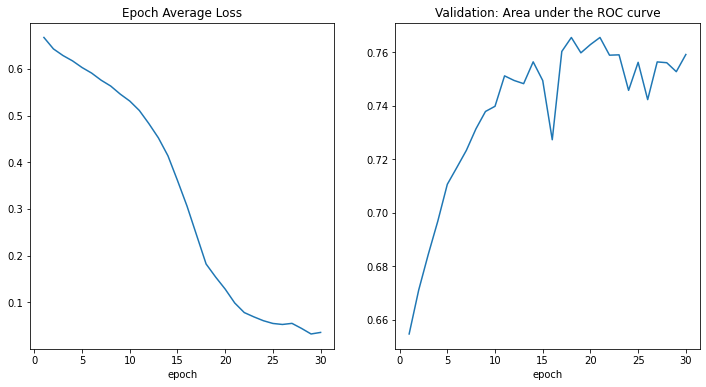

In [16]:
plt.figure('train', (12,6))
plt.subplot(1,2,1)
plt.title("Epoch Average Loss")
x = [i+1 for i in range(len(epoch_loss_values))]
y = epoch_loss_values
plt.xlabel('epoch')
plt.plot(x, y)
plt.subplot(1,2,2)
plt.title("Validation: Area under the ROC curve")
x = [val_interval * (i+1) for i in range(len(metric_values))]
y = metric_values
plt.xlabel('epoch')
plt.plot(x,y)
plt.show()

In [17]:
model.load_state_dict(torch.load('best_metric_model.pth'))
model.eval()
y_true = list()
y_pred = list()

with torch.no_grad():
    for val_data in val_loader:
        val_images, val_labels = val_data[0].to(device), val_data[1].to(device)
        pred = model(val_images.float()).argmax(dim=1)
        for i in range(len(pred)):
            y_true.append(val_labels[i].item())
            y_pred.append(pred[i].item())

In [18]:
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

              precision    recall  f1-score   support

      hotdog     0.7204    0.6837    0.7015       569
   nothotdog     0.6721    0.7096    0.6904       520

    accuracy                         0.6961      1089
   macro avg     0.6963    0.6966    0.6959      1089
weighted avg     0.6973    0.6961    0.6962      1089



In [20]:
t_y_pred = list()
t_y_actual = list()
with torch.no_grad():
    for test_data in test_loader:
        test_images, test_labels = test_data[0].to(device), test_data[1].to(device)
        pred = model(test_images.float()).argmax(dim=1)
        for i in range(len(pred)):
            t_y_pred.append(pred[i].item())
            t_y_actual.append(test_labels[i].item())

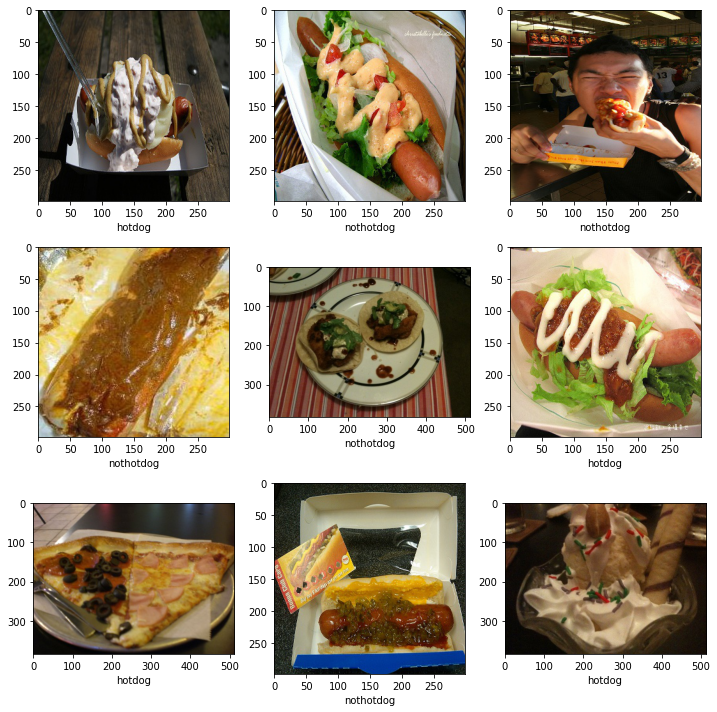

In [21]:
t_num_total=len(t_image_file_list)
plt.subplots(3,3, figsize=(10,10))
for i,k in enumerate(np.random.randint(t_num_total, size=9)):
    im = Image.open(t_image_file_list[k])
    arr = np.array(im)
    plt.subplot(3,3,i+1)
    plt.xlabel(class_names[t_y_pred[i]])
    plt.imshow(arr, cmap='gray', vmin=0, vmax=255)
plt.tight_layout()
plt.show()

#### With a 69.6% test accuracy, the model performs much better than the previous simple CNN approach. But that is our second approach. Let's move on to next approach to see whether our accuracy will improve or not.

# Approach Using Tensorflow and Transfer Learning

Transfer learning is a method of reusing an already trained model for another task. The original training step is called pre-training. The general idea is that, pre-training “teaches” the model more general features, while the latter final training stage “teaches” it features specific to our own (limited) data. In this approach we have used InceptionResNetV2 as pre-training model and based on this we will transfer the learnings from this model into our model and predict the result.

In [1]:
# General Libs
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

im_shape = (299,299)

TRAINING_DIR = '../input/hotdog-nothotdog/hotdog-nothotdog/hotdog-nothotdog/train'
TEST_DIR = '../input/hotdog-nothotdog/hotdog-nothotdog/hotdog-nothotdog/test'

seed = 10

BATCH_SIZE = 16

In [3]:
#Using keras ImageGenerator and flow_from_directoty

# Image dataset without augmentation
#data_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
# With augmentation
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        preprocessing_function=preprocess_input,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
val_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)

In [4]:

train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=True, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")

validation_generator = val_data_generator.flow_from_directory(TRAINING_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_generator.flow_from_directory(TEST_DIR, target_size=im_shape, shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE)

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 3394 images belonging to 2 classes.
Found 848 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Classes: ['hotdog', 'nothotdog']


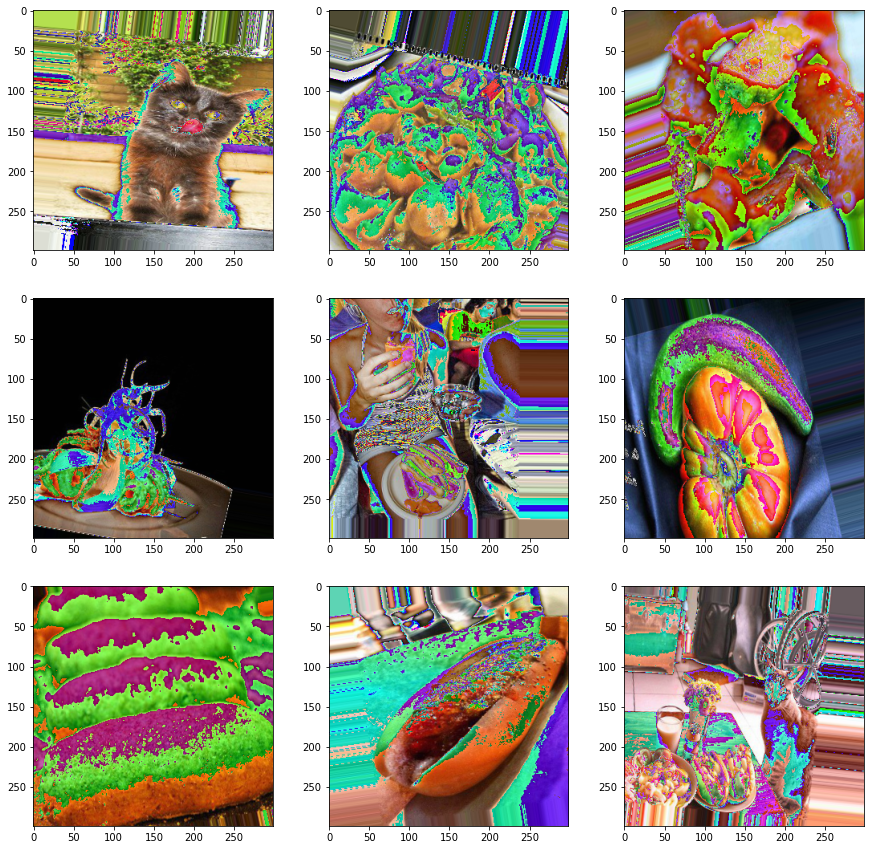

In [5]:

plt.figure(figsize=(15,15))
for i in range(9):
    #gera subfigures
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()


In [6]:
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(im_shape[0], im_shape[1], 3))

x = base_model.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax', kernel_initializer='random_uniform')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freezing pretrained layers
for layer in base_model.layers:
    layer.trainable=False
    
optimizer = Adam()
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

2022-08-11 09:09:27.950965: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-11 09:09:28.060709: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-11 09:09:28.061487: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-11 09:09:28.063081: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

219070464/219055592 [==============================] - 1s 0us/step


In [7]:
epochs = 80

# Saving the best model
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_loss', save_best_only=True, verbose=1),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,verbose=1)
]

history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=epochs,
        callbacks = callbacks_list,
        validation_data=validation_generator,
        verbose = 1,
        validation_steps=nb_validation_samples // BATCH_SIZE)

2022-08-11 09:09:39.479027: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/80


2022-08-11 09:09:50.317707: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


212/212 [==============================] - 134s 555ms/step - loss: 0.3539 - accuracy: 0.9032 - val_loss: 0.0888 - val_accuracy: 0.9705

Epoch 00001: val_loss improved from inf to 0.08879, saving model to model.h5
Epoch 2/80
212/212 [==============================] - 151s 713ms/step - loss: 0.1746 - accuracy: 0.9337 - val_loss: 0.0905 - val_accuracy: 0.9682

Epoch 00002: val_loss did not improve from 0.08879
Epoch 3/80
212/212 [==============================] - 153s 723ms/step - loss: 0.1636 - accuracy: 0.9387 - val_loss: 0.1021 - val_accuracy: 0.9752

Epoch 00003: val_loss did not improve from 0.08879
Epoch 4/80
212/212 [==============================] - 151s 712ms/step - loss: 0.1624 - accuracy: 0.9375 - val_loss: 0.0814 - val_accuracy: 0.9741

Epoch 00004: val_loss improved from 0.08879 to 0.08140, saving model to model.h5
Epoch 5/80
212/212 [==============================] - 131s 619ms/step - loss: 0.1477 - accuracy: 0.9455 - val_loss: 0.0785 - val_accuracy: 0.9776

Epoch 00005: val

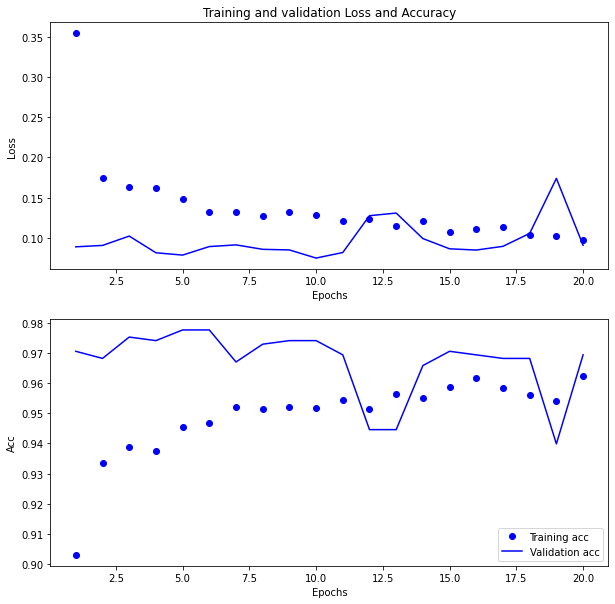

In [8]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs_x = range(1, len(loss_values) + 1)
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
plt.plot(epochs_x, loss_values, 'bo', label='Training loss')
plt.plot(epochs_x, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.legend()
plt.subplot(2,1,2)
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs_x, acc_values, 'bo', label='Training acc')
plt.plot(epochs_x, val_acc_values, 'b', label='Validation acc')
#plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [9]:
from tensorflow.keras.models import load_model
# Load the best saved model
model = load_model('model.h5')

In [10]:
# Using the validation dataset
score = model.evaluate_generator(validation_generator)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Val loss: 0.07483237981796265
Val accuracy: 0.974056601524353


In [11]:
# Using the test dataset
score = model.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14597663283348083
Test accuracy: 0.949999988079071


In [12]:
import itertools

#Plot the confusion matrix. Set Normalize = True/False
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

      hotdog       0.92      0.98      0.95       200
   nothotdog       0.98      0.92      0.95       200

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



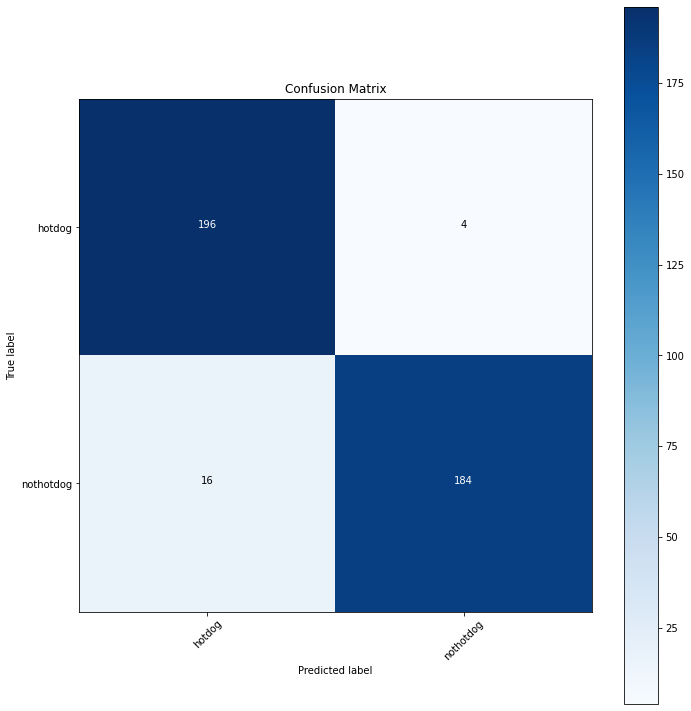

In [13]:
# Some reports
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(test_generator)#, nb_test_samples // BATCH_SIZE, workers=1)
y_pred = np.argmax(Y_pred, axis=1)
target_names = classes

#Confution Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

### So here we have obtained the best accuracy from all the approaches that is **95 percent** and in this further scope can be improved by testing different type of pre-trained models like in our approach we have used InceptionResNetV2 . Other Resnet can also be used for transfer learning purpose.

# Conclusion

### We have implemented three different approaches CNN, Monai Pytorch, And Tensorflow with transfer learning and in each case we obtained the accuracy 52.7%,69.7%, and 95% respectively which clearly indicates that transfer learning for this dataset is best when used with InceptionResNetV2 among all approaches which  has been discussed in this file.
